# South Africa

Courtesy of **Moorissa Tjokro**, September 17, 2017

## Dataset
* Realtime 2017 All Africa File (updated 9th September 2017) (csv)
* Link: http://www.acleddata.com/data/realtime-data
* Fields layout: http://www.acleddata.com/wp-content/uploads/2017/01/ACLED_Codebook_2017.pdf
* All codes below were executed on `Python 3.6` version

In [5]:
# Import libraries
import pandas as pd
import numpy as np
from urllib.request import urlopen

# Plotly libraries for charts
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import cufflinks as cf
cf.set_config_file(offline=False, world_readable=True) #, theme='ggplot')

# For saving plots offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [12]:
# parse data directly from the website and save it locally
url = urlopen("http://www.acleddata.com/wp-content/uploads/2017/09/ACLED-All-Africa-File_20170101-to-20170909_CSV.zip")
output = open('data/ACLED_All_Africa_2017.zip', 'wb')      
output.write(url.read())
output.close()

In [15]:
# read the zip file as a pandas dataframe
df = pd.read_csv('data/ACLED_All_Africa_2017.zip', encoding="ISO-8859-1") #instead of the default 'utf-8'

df.head(2)

,GWNO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,ACTOR1,ALLY_ACTOR_1,INTER1,...,ADMIN1,ADMIN2,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,NOTES,FATALITIES
0,615,11879RTA,NaN,1/1/1997,1997,1,Violence against civilians,GIA: Armed Islamic Group,NaN,2,...,Tipaza,Douaouda,NaN,Douaouda,36.6725,2.7894,1,www.algeria-watch.org,5 January: Beheading of 5 citizens in Douaouda...,5
1,615,11880RTA,NaN,1/2/1997,1997,1,Violence against civilians,GIA: Armed Islamic Group,NaN,2,...,Relizane,Mazouna,NaN,Hassasna,36.1333,0.8833,1,www.algeria-watch.org,Two citizens were beheaded in Hassasna.,2


In [17]:
# Checking size and column names
print(df.shape)
print(df.columns)

(12167, 25)
Index(['GWNO', 'EVENT_ID_CNTY', 'EVENT_ID_NO_CNTY', 'EVENT_DATE', 'YEAR',
       'TIME_PRECISION', 'EVENT_TYPE', 'ACTOR1', 'ALLY_ACTOR_1', 'INTER1',
       'ACTOR2', 'ALLY_ACTOR_2', 'INTER2', 'INTERACTION', 'COUNTRY', 'ADMIN1',
       'ADMIN2', 'ADMIN3', 'LOCATION', 'LATITUDE', 'LONGITUDE',
       'GEO_PRECISION', 'SOURCE', 'NOTES', 'FATALITIES'],
      dtype='object')


In [29]:
# Description based on fields layout:
from IPython.display import Image

print("Fields Description:")
Image(url= "http://i.imgur.com/keuu4vp.png")

Fields Description:


In [32]:
print('INTER 1 and INTER 2 values reference:')
Image(url = "http://i.imgur.com/0wwGGbQ.png")

INTER 1 and INTER 2 values reference:


In [33]:
print('INTERACTION values reference:')
Image(url = "http://i.imgur.com/bX4kSUN.png")

INTERACTION values reference:


In [25]:
# Checking countries and their size
df.groupby('COUNTRY')['GWNO'].count()

COUNTRY
Algeria                          651
Angola                            89
Benin                             30
Burkina Faso                     325
Burundi                          555
Cameroon                         140
Central African Republic         327
Chad                              21
Democratic Republic of Congo     793
Egypt                            458
Equatorial Guinea                  1
Eritrea                            1
Ethiopia                         293
Gabon                             19
Gambia                            37
Ghana                             73
Guinea                            48
Guinea-Bissau                     12
Ivory Coast                       91
Kenya                            321
Lesotho                            3
Liberia                           45
Libya                            594
Madagascar                       113
Malawi                            37
Mali                             348
Mauritania                    

## Data Preprocessing
1. Since we are interested in South Africa, we are going to use select the ZA rows.
2. Based on necessary information, we will also only select columns related to event date, type, actors involved, location, source and fatalities.
3. We then replace the `INTER1`, `INTER2`, and `INTERACTION` numeric codes with their meanings as defined in the tables above.
4. Standardize field names to be more understandable.

In [35]:
columns = [
 'EVENT_DATE',
 'EVENT_TYPE',
 'ACTOR1',
 'ALLY_ACTOR_1',
 'INTER1',
 'ACTOR2',
 'ALLY_ACTOR_2',
 'INTER2',
 'INTERACTION',
 'COUNTRY',
 'LOCATION',
 'LATITUDE',
 'LONGITUDE',
 'SOURCE',
 'NOTES',
 'FATALITIES']

df = df[df.COUNTRY=='South Africa'][columns]
df.head(3)

,EVENT_DATE,EVENT_TYPE,ACTOR1,ALLY_ACTOR_1,INTER1,ACTOR2,ALLY_ACTOR_2,INTER2,INTERACTION,COUNTRY,LOCATION,LATITUDE,LONGITUDE,SOURCE,NOTES,FATALITIES
8764,1/3/2017,Violence against civilians,Vigilante Militia (South Africa),NaN,4,Civilians (South Africa),NaN,7,47,South Africa,Gugulethu,-33.98333,18.56667,Cape Times,A suspected thief was subjected to the as the ...,1
8765,1/4/2017,Riots/Protests,Protesters (South Africa),NaN,6,NaN,NaN,0,60,South Africa,King Williams Town,-32.88031,27.39454,Daily Dispatch (South Africa),Residents of Schornville outside King William'...,0
8766,1/4/2017,Violence against civilians,Vigilante Militia (South Africa),NaN,4,Civilians (South Africa),NaN,7,47,South Africa,Seweding,-25.87075,25.59445,Cape Times (South Africa),Community member allegedly assautled a man in ...,1


In [36]:
df.shape

(782, 16)

In [37]:
# Replacing the INTER1, INTER2, and INTERACTION numeric codes with their meanings as defined in the tables above.

actor_types = {
0: 'NA', # For single actor events, the empty second actor category is coded as “0”.
1: 'Government or mutinous force',
2: 'Rebel force',
3: 'Political militia',
4: 'Ethnic militia',
5: 'Rioters',
6: 'Protesters',
7: 'Civilians',
8: 'External force'}

interaction_types = {
10: 'SOLE MILITARY ACTION',
11: 'MILITARY VERSUS MILITARY',
12: 'MILITARY VERSUS REBELS',
13: 'MILITARY VERSUS POLITICAL MILITIA',
14: 'MILITARY VERSUS COMMUNAL MILITIA',
15: 'MILITARY VERSUS RIOTERS',
16: 'MILITARY VERSUS PROTESTERS',
17: 'MILITARY VERSUS CIVILIANS',
18: 'MILITARY VERSUS OTHER',
20: 'SOLE REBEL ACTION (e.g. base establishment)',
22: 'REBELS VERSUS REBELS',
23: 'REBELS VERSUS POLITICAL MILIITA',
24: 'REBELS VERSUS COMMUNAL MILITIA',
25: 'REBELS VERSUS RIOTERS',
26: 'REBELS VERSUS PROTESTERS',
27: 'REBELS VERSUS CIVILIANS',
28: 'REBELS VERSUS OTHERS',
30: 'SOLE POLITICAL MILITIA ACTION',
33: 'POLITICAL MILITIA VERSUS POLITICAL MILITIA',
34: 'POLITICAL MILITIA VERSUS COMMUNAL MILITIA',
35: 'POLITICAL MILITIA VERSUS RIOTERS',
36: 'POLITICAL MILITIA VERSUS PROTESTERS',
37: 'POLITICAL MILITIA VERSUS CIVILIANS',
38: 'POLITICAL MILITIA VERSUS OTHERS',
40: 'SOLE COMMUNAL MILITIA ACTION',
44: 'COMMUNAL MILITIA VERSUS COMMUNAL MILITIA',
45: 'COMMUNAL MILITIA VERSUS RIOTERS',
46: 'COMMUNAL MILITIA VERSUS PROTESTERS',
47: 'COMMUNAL MILITIA VERSUS CIVILIANS',
48: 'COMMUNAL MILITIA VERSUS OTHER',
50: 'SOLE RIOTER ACTION',
55: 'RIOTERS VERSUS RIOTERS',
56: 'RIOTERS VERSUS PROTESTERS',
57: 'RIOTERS VERSUS CIVILIANS',
58: 'RIOTERS VERSUS OTHERS',
60: 'SOLE PROTESTER ACTION',
66: 'PROTESTERS VERSUS PROTESTERS',
67: 'PROTESTERS VERSUS CIVILIANS',
68: 'PROTESTERS VERSUS OTHER',
78: 'OTHER ACTOR VERSUS CIVILIANS',
80: 'SOLE OTHER ACTION'
}

In [38]:
# Map INTER 1, INTER 2, and INTERACTION codes with their meanings by looking up dictionaries above

actor_type_1_meanings = []
for i in df['INTER1']:
    actor_type_1_meanings.append(actor_types[i])
    
actor_type_2_meanings = []
for i in df['INTER2']:
    actor_type_2_meanings.append(actor_types[i])
    
interaction_meanings = []
for i in df['INTERACTION']:
    interaction_meanings.append(interaction_types[i].capitalize())

df['INTER1'] = actor_type_1_meanings
df['INTER2'] = actor_type_2_meanings
df['INTERACTION'] = interaction_meanings

df.head(3)

,EVENT_DATE,EVENT_TYPE,ACTOR1,ALLY_ACTOR_1,INTER1,ACTOR2,ALLY_ACTOR_2,INTER2,INTERACTION,COUNTRY,LOCATION,LATITUDE,LONGITUDE,SOURCE,NOTES,FATALITIES
8764,1/3/2017,Violence against civilians,Vigilante Militia (South Africa),NaN,Ethnic militia,Civilians (South Africa),NaN,Civilians,Communal militia versus civilians,South Africa,Gugulethu,-33.98333,18.56667,Cape Times,A suspected thief was subjected to the as the ...,1
8765,1/4/2017,Riots/Protests,Protesters (South Africa),NaN,Protesters,NaN,NaN,NA,Sole protester action,South Africa,King Williams Town,-32.88031,27.39454,Daily Dispatch (South Africa),Residents of Schornville outside King William'...,0
8766,1/4/2017,Violence against civilians,Vigilante Militia (South Africa),NaN,Ethnic militia,Civilians (South Africa),NaN,Civilians,Communal militia versus civilians,South Africa,Seweding,-25.87075,25.59445,Cape Times (South Africa),Community member allegedly assautled a man in ...,1


In [40]:
# standardize field names
column_names = {
    'EVENT_DATE': 'Date',
    'EVENT_TYPE': 'Event Type',
    'ACTOR1': 'Actor 1',
    'ALLY_ACTOR_1': 'Actor 1 Ally',
    'INTER1': 'Actor 1 Type',
    'ACTOR2': 'Actor 2',
    'ALLY_ACTOR_2': 'Actor 2 Ally',
    'INTER2': 'Actor 2 Type',
    'INTERACTION': 'Interaction Type',
    'COUNTRY': 'Country',
    'LOCATION': 'Location',
    'LATITUDE': 'Latitude',
    'LONGITUDE': 'Longitude',
    'SOURCE': 'Source',
    'NOTES': 'Notes',
    'FATALITIES': 'Fatalities'}

df = df.rename(columns = column_names)
df.head(3)

,Date,Event Type,Actor 1,Actor 1 Ally,Actor 1 Type,Actor 2,Actor 2 Ally,Actor 2 Type,Interaction Type,Country,Location,Latitude,Longitude,Source,Notes,Fatalities
8764,1/3/2017,Violence against civilians,Vigilante Militia (South Africa),NaN,Ethnic militia,Civilians (South Africa),NaN,Civilians,Communal militia versus civilians,South Africa,Gugulethu,-33.98333,18.56667,Cape Times,A suspected thief was subjected to the as the ...,1
8765,1/4/2017,Riots/Protests,Protesters (South Africa),NaN,Protesters,NaN,NaN,NA,Sole protester action,South Africa,King Williams Town,-32.88031,27.39454,Daily Dispatch (South Africa),Residents of Schornville outside King William'...,0
8766,1/4/2017,Violence against civilians,Vigilante Militia (South Africa),NaN,Ethnic militia,Civilians (South Africa),NaN,Civilians,Communal militia versus civilians,South Africa,Seweding,-25.87075,25.59445,Cape Times (South Africa),Community member allegedly assautled a man in ...,1


In [41]:
# Inspect the data types for each column.
df.dtypes

Date                 object
Event Type           object
Actor 1              object
Actor 1 Ally         object
Actor 1 Type         object
Actor 2              object
Actor 2 Ally         object
Actor 2 Type         object
Interaction Type     object
Country              object
Location             object
Latitude            float64
Longitude           float64
Source               object
Notes                object
Fatalities            int64
dtype: object

In [42]:
# convert date to date type
df['Date'] = pd.to_datetime(df['Date'])

In [43]:
# save dataframe in csv format
df.to_csv('data/ACLED_All_Africa_2017_Clean.csv')

## Conflict Zones
Below is a preview of the map of this data built with Carto. 
* Full map: https://moorissa.carto.com/builder/e0f61bd2-9bce-11e7-852e-0e6ef1df956e/embed

In [49]:
from IPython.display import IFrame
IFrame('https://moorissa.carto.com/builder/e0f61bd2-9bce-11e7-852e-0e6ef1df956e/embed', width=1000, height=700)

## Rural v. Urban Population
* Source: Food and Agriculture Organization of the United Nations, updated 9/18/2017.
* Link: http://www.fao.org/faostat/en/#country/202

In [132]:
df = pd.read_csv("data/FAOSTAT_data_9-18-2017.csv")
df.head(5)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,OA,Annual population,250,Democratic Republic of the Congo,551,Rural population,3010,Population - Est. & Proj.,1990,1990,1000 persons,24217.0,XUru,"UNDESA, Population Division – World Population..."
1,OA,Annual population,250,Democratic Republic of the Congo,561,Urban population,3010,Population - Est. & Proj.,1990,1990,1000 persons,10694.1,XUru,"UNDESA, Population Division – World Population..."
2,OA,Annual population,250,Democratic Republic of the Congo,561,Urban population,3010,Population - Est. & Proj.,1991,1991,1000 persons,11262.8,XUru,"UNDESA, Population Division – World Population..."
3,OA,Annual population,250,Democratic Republic of the Congo,551,Rural population,3010,Population - Est. & Proj.,1991,1991,1000 persons,24990.0,XUru,"UNDESA, Population Division – World Population..."
4,OA,Annual population,250,Democratic Republic of the Congo,551,Rural population,3010,Population - Est. & Proj.,1992,1992,1000 persons,25844.0,XUru,"UNDESA, Population Division – World Population..."


In [133]:
# filter by population type
df = df[['Element', 'Year', 'Value']]
rural = df[df['Element'] == 'Rural population']
urban = df[df['Element'] == 'Urban population']

# visualize data
trace1 = go.Bar(
    x=rural.Year,
    y=rural.Value,
    name='Rural'
)
trace2 = go.Bar(
    x=urban.Year,
    y=urban.Value,
    name='Urban'
)

data = [trace2, trace1]
layout = go.Layout(
    legend=dict(orientation="h", x=0.05,y=0.8),
    title='',
    titlefont=dict(
            size=22),
    xaxis=dict(
        title='Year',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='1000s of Persons',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    barmode='stack'
)

# create figure for offline use
fig = dict( data=data, layout=layout )

# plot inline
iplot(fig, show_link=False)

# save figure offline
myChart = plotly.offline.plot(fig,output_type="div", show_link="False",include_plotlyjs="Flase",link_text="")
with open("images/urban_rural.html", "w") as text_file:
    text_file.write(myChart)

## Demographics: South Africa (ZA) v. Neighboring Countries
* Source: UNESCO
* Link: http://data.uis.unesco.org/
* Table: Demographic and socio-economic -> Demographic indicators -- download the csv file.

In [105]:
df_original = pd.read_csv('data/UNESCO_complete.csv')
print(df_original.shape)
df_original.head()

(37927, 9)


,DEMO_IND,Indicator,LOCATION,Country,TIME,Time,Value,Flag Codes,Flags
0,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,1999,1999,1.755,NaN,NaN
1,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,2000,2000,1.756,NaN,NaN
2,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,2001,2001,1.739,NaN,NaN
3,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,2002,2002,1.756,NaN,NaN
4,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,2003,2003,1.748,NaN,NaN


In [101]:
df_original.Indicator.unique()

array(['Fertility rate, total (births per woman)',
       'Life expectancy at birth, total (years)',
       'Mortality rate, infant (per 1,000 live births)',
       'Population growth (annual %)',
       'Prevalence of HIV, total (% of population ages 15-49)',
       'Rural population (% of total population)',
       'Population aged 25-64 years ', 'Total population ',
       'Population aged 65 years or older ',
       'Population aged 14 years or younger ',
       'Population aged 15-24 years '], dtype=object)

Neighboring countries of ZA:


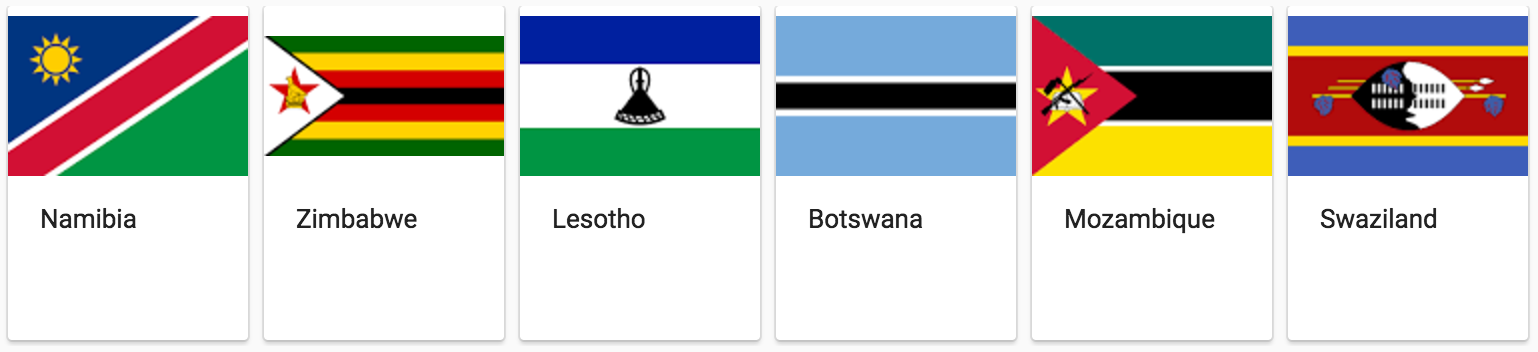

In [106]:
print('Neighboring countries of ZA:')
Image("images/ZA_neighbors.png")

## Fertility Rate

In [120]:
df = df_original.copy()

# select certain fields and manipulate dataset
df = df[df.Indicator == 'Fertility rate, total (births per woman)'][['Country', 'Time', 'Value']]
df.head()

,Country,Time,Value
0,Australia,1999,1.755
1,Australia,2000,1.756
2,Australia,2001,1.739
3,Australia,2002,1.756
4,Australia,2003,1.748


In [121]:
# remove duplicates
df.drop_duplicates(subset=['Country', 'Time', 'Value'], keep='last')
print(df.shape)
df = df.pivot_table(index='Time', columns='Country', values='Value')
df.head()

(3194, 3)


Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,...,United States Virgin Islands,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
Time,,,,,,,,,,,,,,,,,,,,,
1999,7.571,2.249,2.635,NaN,6.943,2.316,2.589,1.712,1.905,1.755,...,2.128,2.0075,2.266,2.72,4.459,2.867,2.096,6.527,6.116,4.108
2000,7.496,2.160,2.514,NaN,6.905,2.316,2.561,1.688,1.874,1.756,...,2.060,2.0560,2.242,2.58,4.368,2.822,2.010,6.335,6.097,4.065
2001,7.395,2.068,2.438,NaN,6.866,2.305,2.537,1.687,1.848,1.739,...,1.900,2.0305,2.222,2.46,4.268,2.779,1.954,6.164,6.080,4.036
2002,7.273,1.975,2.404,NaN,6.829,2.288,2.516,1.698,1.825,1.756,...,2.190,2.0205,2.205,2.52,4.162,2.739,1.920,6.002,6.064,4.018
2003,7.137,1.884,2.407,NaN,6.792,2.268,2.495,1.714,1.805,1.748,...,2.050,2.0475,2.189,2.36,4.056,2.701,1.901,5.842,6.048,4.008


In [122]:
# select neighbor countries and visualize
trace1 = go.Scatter(
    x=df.index,
    y=df.Botswana,
    name='Botswana',
    mode = 'lines'
)

trace2 = go.Scatter(
    x=df.index,
    y=df.Lesotho,
    name='Lesotho',
    mode = 'lines'
)

trace3 = go.Scatter(
    x=df.index,
    y=df.Mozambique,
    name='Mozambique',
    mode = 'lines'
)

trace4 = go.Scatter(
    x=df.index,
    y=df.Namibia,
    name='Namibia',
    mode = 'lines'
)

trace5 = go.Scatter(
    x=df.index,
    y=df['South Africa'],
    name='South Africa',
    mode = 'lines',
    line = dict(
        width = 4,
        dash = 'dash')
)

trace6 = go.Scatter(
    x=df.index,
    y=df['Swaziland'],
    name='Swaziland',
    mode = 'lines'
)

trace7 = go.Scatter(
    x=df.index,
    y=df['Zimbabwe'],
    name='Zimbabwe',
    mode = 'lines'
)


data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7]
layout = go.Layout(showlegend=False,
    title='Fertility Rate',
    titlefont=dict(
            size=22),
    xaxis=dict(
        title='Year',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Births per Woman',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

# create figure for offline use
fig = dict( data=data, layout=layout )

# plot inline
iplot(fig, show_link=False)

# save figure offline
myChart = plotly.offline.plot(fig,output_type="div", show_link="False",include_plotlyjs="Flase",link_text="")
with open("images/fertility_rate.html", "w") as text_file:
    text_file.write(myChart)

## Infant Mortality Rate

In [123]:
df = df_original.copy()

# select certain fields and manipulate dataset
df = df[df.Indicator == 'Mortality rate, infant (per 1,000 live births)'][['Country', 'Time', 'Value']]
df.head()

,Country,Time,Value
5276,Australia,1999,5.3
5277,Australia,2000,5.1
5278,Australia,2001,5.0
5279,Australia,2002,5.0
5280,Australia,2003,4.9


In [124]:
# remove duplicates
df.drop_duplicates(subset=['Country', 'Time', 'Value'], keep='last')
print(df.shape)
df = df.pivot_table(index='Time', columns='Country', values='Value')
df.head()

(3281, 3)


Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
Time,,,,,,,,,,,,,,,,,,,,,
1999,97.2,24.4,34.4,4.1,129.5,14.5,18.5,27.9,5.3,4.7,...,84.5,7.2,15.3,54.0,24.1,20.2,27.0,71.9,100.9,63.5
2000,95.4,23.2,33.9,3.9,128.3,13.8,18.0,26.6,5.1,4.6,...,80.3,7.1,14.6,52.7,23.8,18.5,26.1,69.0,97.6,63.5
2001,93.4,22.1,33.3,3.7,126.9,13.0,17.6,25.3,5.0,4.5,...,75.9,7.0,14.1,51.4,23.6,17.9,25.3,66.1,92.7,63.2
2002,91.2,21.0,32.4,3.5,125.5,12.3,17.1,24.2,5.0,4.4,...,71.4,6.9,13.7,50.0,23.4,17.4,24.6,63.0,86.5,62.7
2003,89.0,20.0,31.3,3.3,124.1,11.7,16.6,23.0,4.9,4.3,...,67.0,6.8,13.3,48.6,23.4,16.9,23.9,60.1,80.0,61.9


In [125]:
# select neighbor countries and visualize
trace1 = go.Scatter(
    x=df.index,
    y=df.Botswana,
    name='Botswana',
    mode = 'lines'
)

trace2 = go.Scatter(
    x=df.index,
    y=df.Lesotho,
    name='Lesotho',
    mode = 'lines'
)

trace3 = go.Scatter(
    x=df.index,
    y=df.Mozambique,
    name='Mozambique',
    mode = 'lines'
)

trace4 = go.Scatter(
    x=df.index,
    y=df.Namibia,
    name='Namibia',
    mode = 'lines'
)

trace5 = go.Scatter(
    x=df.index,
    y=df['South Africa'],
    name='South Africa',
    mode = 'lines',
    line = dict(
        width = 4,
        dash = 'dash')
)

trace6 = go.Scatter(
    x=df.index,
    y=df['Swaziland'],
    name='Swaziland',
    mode = 'lines'
)

trace7 = go.Scatter(
    x=df.index,
    y=df['Zimbabwe'],
    name='Zimbabwe',
    mode = 'lines'
)


data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7]
layout = go.Layout(showlegend=False,
    title='Infant Mortality Rate',
    titlefont=dict(
            size=22),
    xaxis=dict(
        title='Year',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='per 1,000 live births',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

# create figure for offline use
fig = dict( data=data, layout=layout )

# plot inline
iplot(fig, show_link=False)

# save figure offline
myChart = plotly.offline.plot(fig,output_type="div", show_link="False",include_plotlyjs="Flase",link_text="")
with open("images/mortality_rate.html", "w") as text_file:
    text_file.write(myChart)

## Life Expectancy at Birth

In [126]:
df = df_original.copy()

# select certain fields and manipulate dataset
df = df[df.Indicator== 'Life expectancy at birth, total (years)'][['Country', 'Time', 'Value']]
df.head()

,Country,Time,Value
2647,Australia,1999,78.93171
2648,Australia,2000,79.23415
2649,Australia,2001,79.63415
2650,Australia,2002,79.93659
2651,Australia,2003,80.23902


In [127]:
# remove duplicates
df.drop_duplicates(subset=['Country', 'Time', 'Value'], keep='last')
print(df.shape)
df = df.pivot_table(index='Time', columns='Country', values='Value')
df.head()

(3191, 3)


Country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,...,United States Virgin Islands,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
Time,,,,,,,,,,,,,,,,,,,,,
1999,54.76727,73.79339,69.76293,44.43900,73.18602,73.54427,70.76710,73.67539,78.93171,77.87561,...,77.30617,76.58293,74.46634,66.83332,67.15983,72.08627,72.91354,60.22756,42.85578,42.79149
2000,55.12588,74.27154,70.18390,45.20478,73.39729,73.75580,71.27659,73.72061,79.23415,78.12683,...,76.61951,76.63659,74.68598,66.94078,67.55500,72.34612,73.14859,60.45637,43.45668,41.68944
2001,55.48754,74.73256,70.60176,45.97315,73.60710,73.96032,71.75583,73.78290,79.63415,78.57561,...,77.87317,76.83659,74.89605,67.02927,67.93471,72.57561,73.36959,60.67668,44.27249,40.99680
2002,55.85720,75.15461,71.01485,46.71173,73.81544,74.15578,72.20161,73.86524,79.93659,78.67805,...,78.02439,76.93659,75.09556,67.10837,68.29995,72.77527,73.57656,60.88800,45.30666,40.67915
2003,56.23529,75.52329,71.42100,47.39317,74.02178,74.34127,72.60959,73.96856,80.23902,78.63171,...,78.17317,77.03659,75.28451,67.18661,68.65171,72.94456,73.77254,61.09183,46.53863,40.70249


In [128]:
# select neighbor countries and visualize
trace1 = go.Scatter(
    x=df.index,
    y=df.Botswana,
    name='Botswana',
    mode = 'lines'
)

trace2 = go.Scatter(
    x=df.index,
    y=df.Lesotho,
    name='Lesotho',
    mode = 'lines'
)

trace3 = go.Scatter(
    x=df.index,
    y=df.Mozambique,
    name='Mozambique',
    mode = 'lines'
)

trace4 = go.Scatter(
    x=df.index,
    y=df.Namibia,
    name='Namibia',
    mode = 'lines'
)

trace5 = go.Scatter(
    x=df.index,
    y=df['South Africa'],
    name='South Africa',
    mode = 'lines',
    line = dict(
        width = 4,
        dash = 'dash')
)

trace6 = go.Scatter(
    x=df.index,
    y=df['Swaziland'],
    name='Swaziland',
    mode = 'lines'
)

trace7 = go.Scatter(
    x=df.index,
    y=df['Zimbabwe'],
    name='Zimbabwe',
    mode = 'lines'
)


data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7]
layout = go.Layout(showlegend=False,
    title='Life Expectancy at Birth',
    titlefont=dict(
            size=22),
    xaxis=dict(
        title='Year',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='years',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

# create figure for offline use
fig = dict( data=data, layout=layout )

# plot inline
iplot(fig, show_link=False)

# save figure offline
myChart = plotly.offline.plot(fig,output_type="div", show_link="False",include_plotlyjs="Flase",link_text="")
with open("images/expectancy_rate.html", "w") as text_file:
    text_file.write(myChart)

## Prevalence of HIV

In [134]:
df = df_original.copy()

# select certain fields and manipulate dataset
df = df[df.Indicator== 'Prevalence of HIV, total (% of population ages 15-49)'][['Country', 'Time', 'Value']]
df.head()

,Country,Time,Value
10980,Mexico,1999,0.3
10981,Mexico,2000,0.3
10982,Mexico,2001,0.3
10983,Mexico,2002,0.3
10984,Mexico,2003,0.2


In [135]:
# remove duplicates
df.drop_duplicates(subset=['Country', 'Time', 'Value'], keep='last')
print(df.shape)
df = df.pivot_table(index='Time', columns='Country', values='Value')
df.head()

(1802, 3)


Country,Afghanistan,Algeria,Angola,Argentina,Armenia,Australia,Azerbaijan,Bahamas,Bangladesh,Barbados,...,Uganda,Ukraine,United Republic of Tanzania,Uruguay,Uzbekistan,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
Time,,,,,,,,,,,,,,,,,,,,,
1999,0.1,0.1,1.4,0.3,0.1,0.1,0.1,3.0,0.1,0.6,...,8.4,0.6,7.8,0.3,0.1,0.3,0.2,0.1,15.6,24.9
2000,0.1,0.1,1.5,0.3,0.1,0.1,0.1,3.1,0.1,0.7,...,7.8,0.7,7.7,0.4,0.2,0.4,0.2,0.1,15.4,24.0
2001,0.1,0.1,1.6,0.3,0.1,0.1,0.1,3.1,0.1,0.7,...,7.3,0.8,7.5,0.4,0.2,0.4,0.3,0.1,15.2,22.8
2002,0.1,0.1,1.7,0.3,0.1,0.1,0.1,3.1,0.1,0.8,...,7.0,0.8,7.3,0.4,0.3,0.4,0.3,0.1,14.9,21.6
2003,0.1,0.1,1.8,0.4,0.1,0.1,0.1,3.1,0.1,0.8,...,6.7,0.9,7.1,0.5,0.3,0.4,0.3,0.1,14.6,20.4


In [143]:
# select neighbor countries and visualize
trace1 = go.Scatter(
    x=df.index,
    y=df.Botswana,
    name='Botswana',
    mode = 'lines'
)

trace2 = go.Scatter(
    x=df.index,
    y=df.Lesotho,
    name='Lesotho',
    mode = 'lines'
)

trace3 = go.Scatter(
    x=df.index,
    y=df.Mozambique,
    name='Mozambique',
    mode = 'lines'
)

trace4 = go.Scatter(
    x=df.index,
    y=df.Namibia,
    name='Namibia',
    mode = 'lines'
)

trace5 = go.Scatter(
    x=df.index,
    y=df['South Africa'],
    name='South Africa',
    mode = 'lines',
    line = dict(
        width = 4,
        dash = 'dash')
)

trace6 = go.Scatter(
    x=df.index,
    y=df['Swaziland'],
    name='Swaziland',
    mode = 'lines'
)

trace7 = go.Scatter(
    x=df.index,
    y=df['Zimbabwe'],
    name='Zimbabwe',
    mode = 'lines'
)


data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7]
layout = go.Layout(showlegend=True,
    title='Prevalence of HIV',
    titlefont=dict(
            size=22),
    xaxis=dict(
        title='Year',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='% of population ages 15-49',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    legend=dict(
        x=2000,
        y=30,
        traceorder='normal',
        font=dict(
            family='sans-serif',
            size=12,
            color='#000'
        ),orientation='h')
)

# create figure for offline use
fig = dict( data=data, layout=layout )

# plot inline
iplot(fig, show_link=False)

# save figure offline
myChart = plotly.offline.plot(fig,output_type="div", show_link="False",include_plotlyjs="Flase",link_text="")
with open("images/hiv.html", "w") as text_file:
    text_file.write(myChart)

## Socio-economic: South Africa (ZA) v. Neighboring Countries
* Source: UNESCO
* Link: http://data.uis.unesco.org/
* Table: Demographic and socio-economic -> Socio-economic indicators -- download the csv file.

In [147]:
df_original = pd.read_csv('data/UNESCO_socioeconomic.csv')
print(df_original.shape)
df_original.head()

(75298, 9)


/Users/moorissatjokro/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.



,DEMO_IND,Indicator,LOCATION,Country,TIME,Time,Value,Flag Codes,Flags
0,NY_GDP_MKTP_CN,GDP (current LCU),AUS,Australia,1999,1999,6.200000e+11,NaN,NaN
1,NY_GDP_MKTP_CN,GDP (current LCU),AUS,Australia,2000,2000,6.610000e+11,NaN,NaN
2,NY_GDP_MKTP_CN,GDP (current LCU),AUS,Australia,2001,2001,7.050000e+11,NaN,NaN
3,NY_GDP_MKTP_CN,GDP (current LCU),AUS,Australia,2002,2002,7.530000e+11,NaN,NaN
4,NY_GDP_MKTP_CN,GDP (current LCU),AUS,Australia,2003,2003,8.010000e+11,NaN,NaN


In [148]:
df_original.Indicator.unique()

array(['GDP (current LCU)', 'GDP (current US$)',
       'GDP deflator (base year varies by country)',
       'GDP growth (annual %)', 'GDP per capita (current US$)',
       'GDP per capita, PPP (current international $)',
       'GDP, PPP (current international $)',
       'General government total expenditure (current LCU)',
       'GNI per capita, Atlas method (current US$)',
       'GNI per capita, PPP (current international $)',
       'Poverty headcount ratio at $3.10 a day (PPP) (% of population)',
       'Poverty headcount ratio at $1.90 a day (PPP) (% of population)',
       'PPP conversion factor, GDP (LCU per international $)',
       'Total debt service (% of GNI)', 'GNI per capita (current LCU)',
       'GDP at market prices (constant 2010 US$)',
       'Price level ratio of PPP conversion factor (GDP) to market exchange rate',
       'Official exchange rate (LCU per US$, period average)',
       'GDP (constant LCU)',
       'DEC alternative conversion factor (LCU per US$)'

Neighboring countries of ZA:


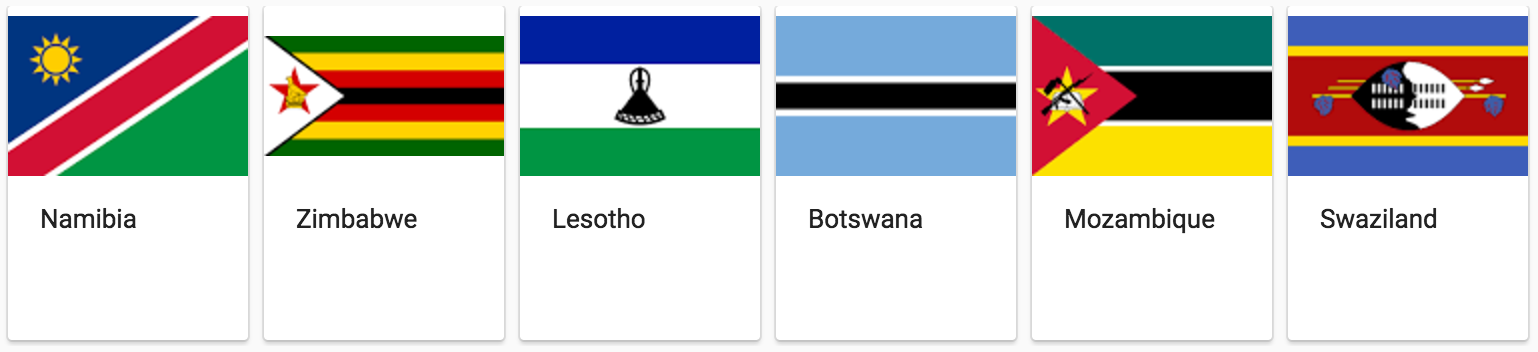

In [106]:
print('Neighboring countries of ZA:')
Image("images/ZA_neighbors.png")

## GDP (current US Dollar)

In [160]:
df = df_original.copy()

# select certain fields and manipulate dataset
df = df[df.Indicator == 'GDP (current US$)'][['Country', 'Time', 'Value']]
df.head()

,Country,Time,Value
2867,Australia,1999,3.890000e+11
2868,Australia,2000,4.150000e+11
2869,Australia,2001,3.780000e+11
2870,Australia,2002,3.940000e+11
2871,Australia,2003,4.660000e+11


In [161]:
# remove duplicates
df.drop_duplicates(subset=['Country', 'Time', 'Value'], keep='last')
print(df.shape)
df = df.pivot_table(index='Time', columns='Country', values='Value')
df.head()

(3339, 3)


Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
Time,,,,,,,,,,,,,,,,,,,,,
1999,NaN,3.414761e+09,4.864061e+10,1.239876e+09,6.152937e+09,651851851.9,2.840000e+11,1.845482e+09,1.722799e+09,3.890000e+11,...,9.697847e+09,9.660000e+12,2.398395e+10,1.707847e+10,267999225.3,9.797689e+10,2.868366e+10,7.641101e+09,3.404312e+09,6.858013e+09
2000,NaN,3.632044e+09,5.479006e+10,1.401695e+09,9.129635e+09,783837851.9,2.840000e+11,1.911564e+09,1.873453e+09,4.150000e+11,...,1.018579e+10,1.030000e+13,2.282326e+10,1.376037e+10,272014693.1,1.170000e+11,3.364009e+10,9.636342e+09,3.600683e+09,6.689958e+09
2001,2.461666e+09,4.060759e+09,5.474471e+10,1.484018e+09,8.936064e+09,773765185.2,2.690000e+11,2.118468e+09,1.920263e+09,3.780000e+11,...,1.038356e+10,1.060000e+13,2.089879e+10,1.140135e+10,257926881.7,1.230000e+11,3.529135e+10,9.854042e+09,4.094481e+09,6.777385e+09
2002,4.128821e+09,4.435079e+09,5.676029e+10,1.717485e+09,1.249735e+10,802529333.3,9.772400e+10,2.376335e+09,1.941095e+09,3.940000e+11,...,1.080560e+10,1.100000e+13,1.360649e+10,9.687951e+09,262603781.8,9.289359e+10,3.794790e+10,1.069328e+10,4.193846e+09,6.342116e+09
2003,4.583644e+09,5.746946e+09,6.786383e+10,2.373928e+09,1.418895e+10,839996370.4,1.280000e+11,2.807061e+09,2.021302e+09,4.660000e+11,...,1.165913e+10,1.150000e+13,1.204563e+10,1.012811e+10,314463144.0,8.362063e+10,4.271707e+10,1.177777e+10,4.901840e+09,5.727592e+09


In [162]:
# select neighbor countries and visualize
trace1 = go.Scatter(
    x=df.index,
    y=df.Botswana,
    name='Botswana',
    mode = 'lines'
)

trace2 = go.Scatter(
    x=df.index,
    y=df.Lesotho,
    name='Lesotho',
    mode = 'lines'
)

trace3 = go.Scatter(
    x=df.index,
    y=df.Mozambique,
    name='Mozambique',
    mode = 'lines'
)

trace4 = go.Scatter(
    x=df.index,
    y=df.Namibia,
    name='Namibia',
    mode = 'lines'
)

trace5 = go.Scatter(
    x=df.index,
    y=df['South Africa'],
    name='South Africa',
    mode = 'lines',
    line = dict(
        width = 4,
        dash = 'dash')
)

trace6 = go.Scatter(
    x=df.index,
    y=df['Swaziland'],
    name='Swaziland',
    mode = 'lines'
)

trace7 = go.Scatter(
    x=df.index,
    y=df['Zimbabwe'],
    name='Zimbabwe',
    mode = 'lines'
)


data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7]
layout = go.Layout(showlegend=False,
    title='Gross Domestic Product (GDP)',
    titlefont=dict(
            size=22),
    xaxis=dict(
        title='Year',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='current US$',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

# create figure for offline use
fig = dict( data=data, layout=layout )

# plot inline
iplot(fig, show_link=False)

# save figure offline
myChart = plotly.offline.plot(fig,output_type="div", show_link="False",include_plotlyjs="Flase",link_text="")
with open("images/GDP.html", "w") as text_file:
    text_file.write(myChart)

## GDP per capita (current US Dollar)

In [153]:
df = df_original.copy()

# select certain fields and manipulate dataset
df = df[df.Indicator == 'GDP per capita (current US$)'][['Country', 'Time', 'Value']]
df.head()

,Country,Time,Value
11102,Australia,1999,20536.41231
11103,Australia,2000,21665.11545
11104,Australia,2001,19495.14593
11105,Australia,2002,20059.45207
11106,Australia,2003,23440.00532


In [154]:
# remove duplicates
df.drop_duplicates(subset=['Country', 'Time', 'Value'], keep='last')
print(df.shape)
df = df.pivot_table(index='Time', columns='Country', values='Value')
df.head()

(3339, 3)


Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
Time,,,,,,,,,,,,,,,,,,,,,
1999,NaN,1098.42546,1580.95757,19324.45419,421.37678,8572.37348,7736.37258,596.50600,19356.42087,20536.41231,...,301.20049,34620.92890,7247.39816,702.48074,1477.83367,4078.40147,374.47642,441.56928,330.21725,554.22681
2000,NaN,1175.78898,1757.01197,21432.97646,606.27229,10094.75906,7669.27371,621.42483,20619.56585,21665.11545,...,308.40628,36449.85512,6871.90388,558.22114,1469.88886,4784.87158,433.33371,541.51299,340.16138,535.19742
2001,119.89902,1326.97034,1732.95852,21897.85889,574.19416,9797.96871,7170.68970,692.30163,20671.54574,19495.14593,...,306.23999,37273.61810,6281.37327,456.70349,1362.61613,4927.94151,448.88228,538.28732,376.98106,537.71748
2002,192.15365,1453.64278,1774.29202,24174.27319,775.76552,10027.85622,2579.18820,779.82963,20433.65411,20059.45207,...,310.20728,38166.03784,4088.77254,383.34950,1353.92784,3657.35126,477.10588,567.82196,376.46804,499.71641
2003,203.65083,1890.68156,2094.89330,31744.21680,850.07569,10382.63090,3330.42866,924.46401,20834.93971,23440.00532,...,325.55077,39677.19835,3622.05228,396.12997,1580.51067,3233.89567,530.86185,607.91580,429.00728,448.37319


In [159]:
# select neighbor countries and visualize
trace1 = go.Scatter(
    x=df.index,
    y=df.Botswana,
    name='Botswana',
    mode = 'lines'
)

trace2 = go.Scatter(
    x=df.index,
    y=df.Lesotho,
    name='Lesotho',
    mode = 'lines'
)

trace3 = go.Scatter(
    x=df.index,
    y=df.Mozambique,
    name='Mozambique',
    mode = 'lines'
)

trace4 = go.Scatter(
    x=df.index,
    y=df.Namibia,
    name='Namibia',
    mode = 'lines'
)

trace5 = go.Scatter(
    x=df.index,
    y=df['South Africa'],
    name='South Africa',
    mode = 'lines',
    line = dict(
        width = 4,
        dash = 'dash')
)

trace6 = go.Scatter(
    x=df.index,
    y=df['Swaziland'],
    name='Swaziland',
    mode = 'lines'
)

trace7 = go.Scatter(
    x=df.index,
    y=df['Zimbabwe'],
    name='Zimbabwe',
    mode = 'lines'
)


data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7]
layout = go.Layout(showlegend=False,
    title='GDP per capita',
    titlefont=dict(
            size=22),
    xaxis=dict(
        title='Year',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='current US$',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

# create figure for offline use
fig = dict( data=data, layout=layout )

# plot inline
iplot(fig, show_link=False)

# save figure offline
myChart = plotly.offline.plot(fig,output_type="div", show_link="False",include_plotlyjs="Flase",link_text="")
with open("images/GDPpercapita.html", "w") as text_file:
    text_file.write(myChart)

## Poverty headcount ratio at USD 3.10 a day (PPP) (% of population)

In [177]:
df = df_original.copy()

# select certain fields and manipulate dataset
df = df[df.Indicator == 'Poverty headcount ratio at $3.10 a day (PPP) (% of population)'][['Country', 'Time', 'Value']]
df.head()

,Country,Time,Value
26652,Czechia,2004,0.03
26653,Czechia,2005,0.06
26654,Czechia,2006,0.08
26655,Czechia,2007,0.20
26656,Czechia,2008,0.13


In [178]:
# remove duplicates
df.drop_duplicates(subset=['Country', 'Time', 'Value'], keep='last')
print(df.shape)
df = df.pivot_table(index='Time', columns='Country', values='Value')
df.head()

(767, 3)


Country,Albania,Angola,Argentina,Armenia,Azerbaijan,Bangladesh,Belarus,Belize,Benin,Bhutan,...,Uganda,Ukraine,United Republic of Tanzania,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Zambia,Zimbabwe
Time,,,,,,,,,,,,,,,,,,,,,
1999,NaN,NaN,10.15,50.02,NaN,NaN,31.61,27.2,NaN,NaN,...,84.64,34.65,NaN,NaN,NaN,NaN,20.47,NaN,NaN,NaN
2000,NaN,54.25,12.12,NaN,NaN,70.06,25.51,NaN,NaN,NaN,...,NaN,NaN,95.26,2.63,88.71,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,17.05,53.09,16.32,NaN,13.95,NaN,NaN,NaN,...,NaN,NaN,NaN,3.35,NaN,NaN,19.05,NaN,NaN,NaN
2002,16.61,NaN,25.40,49.45,0.24,NaN,10.01,NaN,NaN,NaN,...,82.48,10.58,NaN,4.32,87.99,NaN,27.83,69.32,75.08,NaN
2003,NaN,NaN,19.14,45.48,0.35,NaN,8.29,NaN,77.22,60.9,...,NaN,6.25,NaN,5.22,87.82,NaN,33.58,NaN,NaN,NaN


In [179]:
# select neighbor countries and visualize
trace1 = go.Scatter(
    x=df.index,
    y=df.Botswana,
    name='Botswana',
    mode = 'markers',
    marker = dict(
        size = 10,
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace2 = go.Scatter(
    x=df.index,
    y=df.Lesotho,
    name='Lesotho',
    mode = 'markers',
    marker = dict(
        size = 10,
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace3 = go.Scatter(
    x=df.index,
    y=df.Mozambique,
    name='Mozambique',
    mode = 'markers',
    marker = dict(
        size = 10,
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace4 = go.Scatter(
    x=df.index,
    y=df.Namibia,
    name='Namibia',
    mode = 'markers',
    marker = dict(
        size = 10,
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace5 = go.Scatter(
    x=df.index,
    y=df['South Africa'],
    name='South Africa',
    mode = 'markers',
    marker = dict(
        size = 10,
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    ),
    line = dict(
        width = 4,
        dash = 'dash')
)

trace6 = go.Scatter(
    x=df.index,
    y=df['Swaziland'],
    name='Swaziland',
    mode = 'markers',
    marker = dict(
        size = 10,
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace7 = go.Scatter(
    x=df.index,
    y=df['Zimbabwe'],
    name='Zimbabwe',
    mode = 'markers',
    marker = dict(
        size = 10,
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)


data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7]
layout = go.Layout(showlegend=False,
    title='Poverty headcount ratio at $3.10 a day (PPP)',
    titlefont=dict(
            size=22),
    xaxis=dict(
        title='Year',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='% of population',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

# create figure for offline use
fig = dict( data=data, layout=layout )

# plot inline
iplot(fig, show_link=False)

# save figure offline
myChart = plotly.offline.plot(fig,output_type="div", show_link="False",include_plotlyjs="Flase",link_text="")
with open("images/poverty310.html", "w") as text_file:
    text_file.write(myChart)

## Poverty headcount ratio at USD 1.90 a day (PPP) (% of population)

In [172]:
df = df_original.copy()

# select certain fields and manipulate dataset
df = df[df.Indicator == 'Poverty headcount ratio at $1.90 a day (PPP) (% of population)'][['Country', 'Time', 'Value']]
df.head()

,Country,Time,Value
27280,Czechia,2004,NaN
27281,Czechia,2005,NaN
27282,Czechia,2006,0.07
27283,Czechia,2007,0.12
27284,Czechia,2008,0.04


In [173]:
# remove duplicates
df.drop_duplicates(subset=['Country', 'Time', 'Value'], keep='last')
print(df.shape)
df = df.pivot_table(index='Time', columns='Country', values='Value')
df.head()

(767, 3)


Country,Albania,Angola,Argentina,Armenia,Azerbaijan,Bangladesh,Belarus,Belize,Benin,Bhutan,...,Uganda,Ukraine,United Republic of Tanzania,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Zambia,Zimbabwe
Time,,,,,,,,,,,,,,,,,,,,,
1999,NaN,NaN,4.78,16.88,NaN,NaN,10.25,13.92,NaN,NaN,...,64.12,8.26,NaN,NaN,NaN,NaN,10.16,NaN,NaN,NaN
2000,NaN,32.28,5.70,NaN,NaN,33.74,7.11,NaN,NaN,NaN,...,NaN,NaN,84.74,0.57,68.07,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,9.42,19.33,2.71,NaN,3.15,NaN,NaN,NaN,...,NaN,NaN,NaN,0.75,NaN,NaN,9.59,NaN,NaN,NaN
2002,2.35,NaN,13.99,15.06,NaN,NaN,2.03,NaN,NaN,NaN,...,62.21,1.67,NaN,1.08,65.57,NaN,16.03,38.78,49.44,NaN
2003,NaN,NaN,9.79,11.36,NaN,NaN,1.40,NaN,48.85,35.22,...,NaN,0.63,NaN,1.31,66.79,NaN,20.03,NaN,NaN,NaN


In [180]:
# select neighbor countries and visualize
trace1 = go.Scatter(
    x=df.index,
    y=df.Botswana,
    name='Botswana',
    mode = 'markers',
    marker = dict(
        size = 10,
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace2 = go.Scatter(
    x=df.index,
    y=df.Lesotho,
    name='Lesotho',
    mode = 'markers',
    marker = dict(
        size = 10,
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace3 = go.Scatter(
    x=df.index,
    y=df.Mozambique,
    name='Mozambique',
    mode = 'markers',
    marker = dict(
        size = 10,
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace4 = go.Scatter(
    x=df.index,
    y=df.Namibia,
    name='Namibia',
    mode = 'markers',
    marker = dict(
        size = 10,
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace5 = go.Scatter(
    x=df.index,
    y=df['South Africa'],
    name='South Africa',
    mode = 'markers',
    marker = dict(
        size = 10,
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    ),
    line = dict(
        width = 4,
        dash = 'dash')
)

trace6 = go.Scatter(
    x=df.index,
    y=df['Swaziland'],
    name='Swaziland',
    mode = 'markers',
    marker = dict(
        size = 10,
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace7 = go.Scatter(
    x=df.index,
    y=df['Zimbabwe'],
    name='Zimbabwe',
    mode = 'markers',
    marker = dict(
        size = 10,
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)


data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7]
layout = go.Layout(showlegend=True,
    title='Poverty headcount ratio at $1.90 a day (PPP)',
    titlefont=dict(
            size=22),
    xaxis=dict(
        title='Year',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='% of population',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    legend=dict(
        x=2000,
        y=30,
        traceorder='normal',
        font=dict(
            family='sans-serif',
            size=12,
            color='#000'
        ),orientation='h')
)

# create figure for offline use
fig = dict( data=data, layout=layout )

# plot inline
iplot(fig, show_link=False)

# save figure offline
myChart = plotly.offline.plot(fig,output_type="div", show_link="False",include_plotlyjs="Flase",link_text="")
with open("images/poverty190.html", "w") as text_file:
    text_file.write(myChart)